**Activites List**

**Activity 1**

- Aggregate data into one Data Frame using Pandas.
- Standardizing header names
- Deleting and rearranging columns – delete the column customer as it is only a unique identifier for each row of data
- Working with data types – Check the data types of all the columns and fix the incorrect ones (for ex. customer lifetime value and number of open complaints ). Hint: remove the percentage from the customer lifetime value and truncate it to an integer value.
- clean the number of open complaints and extract the middle number which is changing between records. pay attention that the number of open complaints is a categorical feature.
- Filtering data and Correcting typos – Filter the data in state and gender column to standardize the texts in those columns
- Removing duplicates

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows = 100

/Users/deni.emmer/opt/anaconda3/envs/DA/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
df = pd.read_csv ('Data/file3.csv')
df

,Customer,State,Customer Lifetime Value,Education,Gender,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Total Claim Amount,Vehicle Class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,23405.987980,Bachelor,M,71941,73,0,Personal Auto,198.234764,Four-Door Car
7066,PK87824,California,3096.511217,College,F,21604,79,0,Corporate Auto,379.200000,Four-Door Car
7067,TD14365,California,8163.890428,Bachelor,M,0,85,3,Corporate Auto,790.784983,Four-Door Car
7068,UP19263,California,7524.442436,College,M,21941,96,0,Personal Auto,691.200000,Four-Door Car


In [3]:
def rename_columns(df):
    df.rename(columns={'State':'ST','Gender':'GENDER'}, inplace=True )
    return df

In [4]:
rename_columns(df)

,Customer,ST,Customer Lifetime Value,Education,GENDER,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Total Claim Amount,Vehicle Class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,23405.987980,Bachelor,M,71941,73,0,Personal Auto,198.234764,Four-Door Car
7066,PK87824,California,3096.511217,College,F,21604,79,0,Corporate Auto,379.200000,Four-Door Car
7067,TD14365,California,8163.890428,Bachelor,M,0,85,3,Corporate Auto,790.784983,Four-Door Car
7068,UP19263,California,7524.442436,College,M,21941,96,0,Personal Auto,691.200000,Four-Door Car


In [5]:
df.to_csv('file3_clean.csv')
          

In [6]:
def load_original_data():
    file1 = pd.read_csv('Data/file1.csv')
    file2 = pd.read_csv('Data/file2.csv')
    file3_clean = pd.read_csv('file3_clean.csv')
    return pd.concat([file1,file2,file3_clean], axis=0)

In [7]:
customer_df=load_original_data()

In [8]:
customer_df

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount,Unnamed: 0
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934,NaN
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935,NaN
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247,NaN
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344,NaN
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764,7065.0
7066,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000,7066.0
7067,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983,7067.0
7068,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000,7068.0


In [9]:
def lower_case_column_names(customer_df):
    customer_df.columns=[i.lower() for i in customer_df.columns]
    return customer_df

In [10]:
lower_case_column_names(customer_df)

,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount,unnamed: 0
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934,NaN
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935,NaN
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247,NaN
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344,NaN
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764,7065.0
7066,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000,7066.0
7067,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983,7067.0
7068,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000,7068.0


In [11]:
def drop_columns(customer_df):
    customer_df.drop(columns=["customer"], inplace=True)
    return customer_df

In [12]:
drop_columns(customer_df)

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount,unnamed: 0
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934,NaN
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935,NaN
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247,NaN
3,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344,NaN
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764,7065.0
7066,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000,7066.0
7067,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983,7067.0
7068,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000,7068.0


In [13]:
customer_df.columns

Index(['st', 'gender', 'education', 'customer lifetime value', 'income',
       'monthly premium auto', 'number of open complaints', 'policy type',
       'vehicle class', 'total claim amount', 'unnamed: 0'],
      dtype='object')

In [14]:
customer_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12074 entries, 0 to 7069
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   st                         9137 non-null   object 
 1   gender                     9015 non-null   object 
 2   education                  9137 non-null   object 
 3   customer lifetime value    9130 non-null   object 
 4   income                     9137 non-null   float64
 5   monthly premium auto       9137 non-null   float64
 6   number of open complaints  9137 non-null   object 
 7   policy type                9137 non-null   object 
 8   vehicle class              9137 non-null   object 
 9   total claim amount         9137 non-null   float64
 10  unnamed: 0                 7070 non-null   float64
dtypes: float64(4), object(7)
memory usage: 1.1+ MB


In [15]:
customer_df['number of open complaints'] =  pd.to_numeric(customer_df['number of open complaints'], errors='coerce')
customer_df['total claim amount'] = pd.to_numeric(customer_df['total claim amount'], errors='coerce')

In [16]:
customer_df['number of open complaints'] =  pd.to_numeric(customer_df['number of open complaints'], errors ='ignore')
customer_df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount,unnamed: 0
0,Washington,NaN,Master,NaN,0.0,1000.0,NaN,Personal Auto,Four-Door Car,2.704934,NaN
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,NaN,Personal Auto,Four-Door Car,1131.464935,NaN
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,NaN,Personal Auto,Two-Door Car,566.472247,NaN
3,California,M,Bachelor,764586.18%,0.0,106.0,NaN,Corporate Auto,SUV,529.881344,NaN
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,NaN,Personal Auto,Four-Door Car,17.269323,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,23405.98798,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764,7065.0
7066,California,F,College,3096.511217,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000,7066.0
7067,California,M,Bachelor,8163.890428,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983,7067.0
7068,California,M,College,7524.442436,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000,7068.0


In [17]:
customer_df['number of open complaints'].unique().tolist()

[nan, 0.0, 2.0, 3.0, 1.0, 5.0, 4.0]

In [18]:
customer_df.loc[:, 'number of open complaints'][(customer_df['number of open complaints'] == '1/0/00')] = 0
customer_df.loc[:, 'number of open complaints'][(customer_df['number of open complaints'] == '1/2/00')] = 2
customer_df.loc[:, 'number of open complaints'][(customer_df['number of open complaints'] == '1/3/00')] = 3
customer_df.loc[:, 'number of open complaints'][(customer_df['number of open complaints'] == '1/5/00')] = 5
customer_df.loc[:, 'number of open complaints'][(customer_df['number of open complaints'] == '1/4/00')] = 4
customer_df.loc[:, 'number of open complaints'][(customer_df['number of open complaints'] == '1/1/00')] = 1
customer_df['number of open complaints'].unique()

/var/folders/fz/8c6p2kfn5z98lys6tff8f9jm0000gn/T/ipykernel_54139/4127312646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df.loc[:, 'number of open complaints'][(customer_df['number of open complaints'] == '1/0/00')] = 0
/var/folders/fz/8c6p2kfn5z98lys6tff8f9jm0000gn/T/ipykernel_54139/4127312646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df.loc[:, 'number of open complaints'][(customer_df['number of open complaints'] == '1/2/00')] = 2
/var/folders/fz/8c6p2kfn5z98lys6tff8f9jm0000gn/T/ipykernel_54139/4127312646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

array([nan,  0.,  2.,  3.,  1.,  5.,  4.])

In [19]:
customer_df['gender'].unique()

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [20]:
customer_df.loc[:, 'gender'][(customer_df['gender'] == 'female')] = "F"
customer_df.loc[:, 'gender'][(customer_df['gender'] == 'Femal')] = "F"
customer_df.loc[:, 'gender'][(customer_df['gender'] == 'Male')] = "M"


customer_df['gender'].unique()

/var/folders/fz/8c6p2kfn5z98lys6tff8f9jm0000gn/T/ipykernel_54139/500728694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df.loc[:, 'gender'][(customer_df['gender'] == 'female')] = "F"
/var/folders/fz/8c6p2kfn5z98lys6tff8f9jm0000gn/T/ipykernel_54139/500728694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df.loc[:, 'gender'][(customer_df['gender'] == 'Femal')] = "F"
/var/folders/fz/8c6p2kfn5z98lys6tff8f9jm0000gn/T/ipykernel_54139/500728694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

array([nan, 'F', 'M'], dtype=object)

In [21]:
customer_df.gender.unique()

array([nan, 'F', 'M'], dtype=object)

In [22]:
customer_df.st.unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA', nan], dtype=object)

In [23]:
customer_df['st'].unique()
customer_df.loc[:,'st'][(customer_df['st'] == 'Cali')] = "California"
customer_df.loc[:,'st'][(customer_df['st'] == 'AZ')] = "Arizona"
customer_df.loc[:,'st'][(customer_df['st'] == 'WA')] = "Washington"
customer_df['st'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA', nan], dtype=object)

/var/folders/fz/8c6p2kfn5z98lys6tff8f9jm0000gn/T/ipykernel_54139/308125048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df.loc[:,'st'][(customer_df['st'] == 'Cali')] = "California"
/var/folders/fz/8c6p2kfn5z98lys6tff8f9jm0000gn/T/ipykernel_54139/308125048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df.loc[:,'st'][(customer_df['st'] == 'AZ')] = "Arizona"
/var/folders/fz/8c6p2kfn5z98lys6tff8f9jm0000gn/T/ipykernel_54139/308125048.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', nan],
      dtype=object)

In [24]:
customer_df.drop_duplicates()

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount,unnamed: 0
0,Washington,NaN,Master,NaN,0.0,1000.0,NaN,Personal Auto,Four-Door Car,2.704934,NaN
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,NaN,Personal Auto,Four-Door Car,1131.464935,NaN
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,NaN,Personal Auto,Two-Door Car,566.472247,NaN
3,California,M,Bachelor,764586.18%,0.0,106.0,NaN,Corporate Auto,SUV,529.881344,NaN
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,NaN,Personal Auto,Four-Door Car,17.269323,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,23405.98798,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764,7065.0
7066,California,F,College,3096.511217,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000,7066.0
7067,California,M,Bachelor,8163.890428,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983,7067.0
7068,California,M,College,7524.442436,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000,7068.0


In [25]:
round(customer_df.isna().sum()/len(customer_df),4)*100

st                           24.32
gender                       25.34
education                    24.32
customer lifetime value      24.38
income                       24.32
monthly premium auto         24.32
number of open complaints    41.44
policy type                  24.32
vehicle class                24.32
total claim amount           24.32
unnamed: 0                   41.44
dtype: float64

In [26]:
mean_median_income = np.mean(customer_df['income'])
customer_df['income'] = customer_df['income'].fillna(mean_median_income)

In [27]:
mean_median_mpa = np.mean(customer_df['monthly premium auto'])
customer_df['monthly premium auto'] = customer_df['monthly premium auto'].fillna(mean_median_mpa)

In [28]:
mean_median_tca = np.mean(customer_df['total claim amount'])
customer_df['total claim amount'] = customer_df['total claim amount'].fillna(mean_median_tca)

In [29]:
mean_median_u8 = np.mean(customer_df['unnamed: 0'])
customer_df['unnamed: 0'] = customer_df['unnamed: 0'].fillna(mean_median_u8)

In [30]:
mean_median_noc = np.mean(customer_df['number of open complaints'])
customer_df['number of open complaints'] = customer_df['number of open complaints'].fillna(mean_median_noc)

In [31]:
customer_df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount,unnamed: 0
0,Washington,NaN,Master,NaN,0.0,1000.0,0.3843,Personal Auto,Four-Door Car,2.704934,3534.5
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,0.3843,Personal Auto,Four-Door Car,1131.464935,3534.5
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,0.3843,Personal Auto,Two-Door Car,566.472247,3534.5
3,California,M,Bachelor,764586.18%,0.0,106.0,0.3843,Corporate Auto,SUV,529.881344,3534.5
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,0.3843,Personal Auto,Four-Door Car,17.269323,3534.5
...,...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,23405.98798,71941.0,73.0,0.0000,Personal Auto,Four-Door Car,198.234764,7065.0
7066,California,F,College,3096.511217,21604.0,79.0,0.0000,Corporate Auto,Four-Door Car,379.200000,7066.0
7067,California,M,Bachelor,8163.890428,0.0,85.0,3.0000,Corporate Auto,Four-Door Car,790.784983,7067.0
7068,California,M,College,7524.442436,21941.0,96.0,0.0000,Personal Auto,Four-Door Car,691.200000,7068.0


**Activity 2**

**Bucketing the data - Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central
Standardizing the data – Use string functions to standardize the text data (lower case)**

In [32]:
customer_df['st'].replace(['California', 'Oregon', 'Washington', 'Arizona', 'Nevada'], ['West Region', 'North West', 'East', 'Central', 'Central'])

0              East
1           Central
2           Central
3       West Region
4              East
           ...     
7065    West Region
7066    West Region
7067    West Region
7068    West Region
7069    West Region
Name: st, Length: 12074, dtype: object

In [33]:
customer_df = customer_df.applymap(lambda s:s.lower() if type(s) == str else s)

In [34]:
customer_df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount,unnamed: 0
0,washington,NaN,master,NaN,0.0,1000.0,0.3843,personal auto,four-door car,2.704934,3534.5
1,arizona,f,bachelor,697953.59%,0.0,94.0,0.3843,personal auto,four-door car,1131.464935,3534.5
2,nevada,f,bachelor,1288743.17%,48767.0,108.0,0.3843,personal auto,two-door car,566.472247,3534.5
3,california,m,bachelor,764586.18%,0.0,106.0,0.3843,corporate auto,suv,529.881344,3534.5
4,washington,m,high school or below,536307.65%,36357.0,68.0,0.3843,personal auto,four-door car,17.269323,3534.5
...,...,...,...,...,...,...,...,...,...,...,...
7065,california,m,bachelor,23405.98798,71941.0,73.0,0.0000,personal auto,four-door car,198.234764,7065.0
7066,california,f,college,3096.511217,21604.0,79.0,0.0000,corporate auto,four-door car,379.200000,7066.0
7067,california,m,bachelor,8163.890428,0.0,85.0,3.0000,corporate auto,four-door car,790.784983,7067.0
7068,california,m,college,7524.442436,21941.0,96.0,0.0000,personal auto,four-door car,691.200000,7068.0


In [35]:
customer_df._get_numeric_data()

,income,monthly premium auto,number of open complaints,total claim amount,unnamed: 0
0,0.0,1000.0,0.3843,2.704934,3534.5
1,0.0,94.0,0.3843,1131.464935,3534.5
2,48767.0,108.0,0.3843,566.472247,3534.5
3,0.0,106.0,0.3843,529.881344,3534.5
4,36357.0,68.0,0.3843,17.269323,3534.5
...,...,...,...,...,...
7065,71941.0,73.0,0.0000,198.234764,7065.0
7066,21604.0,79.0,0.0000,379.200000,7066.0
7067,0.0,85.0,3.0000,790.784983,7067.0
7068,21941.0,96.0,0.0000,691.200000,7068.0


In [36]:
customer_df.select_dtypes('object')

,st,gender,education,customer lifetime value,policy type,vehicle class
0,washington,NaN,master,NaN,personal auto,four-door car
1,arizona,f,bachelor,697953.59%,personal auto,four-door car
2,nevada,f,bachelor,1288743.17%,personal auto,two-door car
3,california,m,bachelor,764586.18%,corporate auto,suv
4,washington,m,high school or below,536307.65%,personal auto,four-door car
...,...,...,...,...,...,...
7065,california,m,bachelor,23405.98798,personal auto,four-door car
7066,california,f,college,3096.511217,corporate auto,four-door car
7067,california,m,bachelor,8163.890428,corporate auto,four-door car
7068,california,m,college,7524.442436,personal auto,four-door car


In [37]:
df2 = pd.read_csv ('Data/Data_Marketing_Customer_Analysis_Round3.csv')
df2

,Unnamed: 0,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [38]:
def drop_columns(df2):
    df2.drop(columns=["Unnamed: 0"], inplace=True)
    return df2

In [39]:
drop_columns(df2)

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,26794,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,64811,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


**Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)**

In [40]:
numerical = df2.select_dtypes(include=np.number)
numerical


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [41]:
categorical = df2.select_dtypes(include=np.object)
categorical

/var/folders/fz/8c6p2kfn5z98lys6tff8f9jm0000gn/T/ipykernel_54139/2544183665.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = df2.select_dtypes(include=np.object)


,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


*Now we will try to check the normality of the numerical variables visually*

*Using seaborn library to construct distribution plots for the numerical variables:*

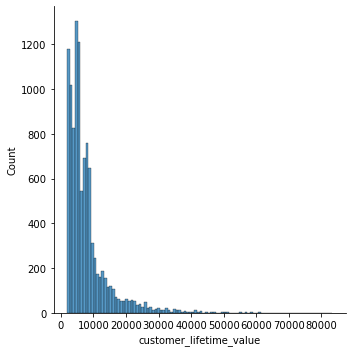

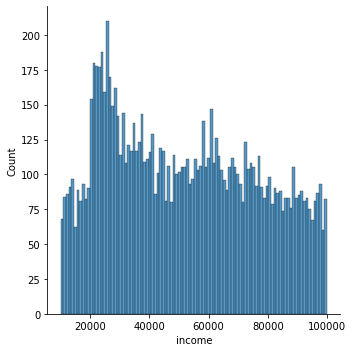

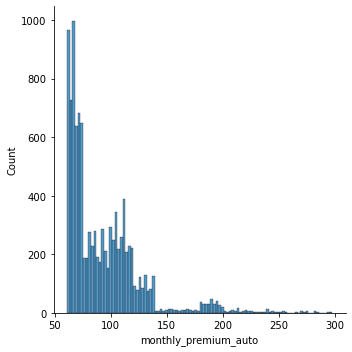

In [42]:
sns.displot((numerical['customer_lifetime_value']), bins=100)
sns.displot((numerical['income']), bins=100)
sns.displot((numerical['monthly_premium_auto']), bins=100)
plt.show();

*In the distribution plots we can see that the plots do not follow a normal distribution, because their shapes are irregular (not symmetric). We also cannot see the mean of most of the values because of this.*

*Using panda to construct histograms (it is more practical)*

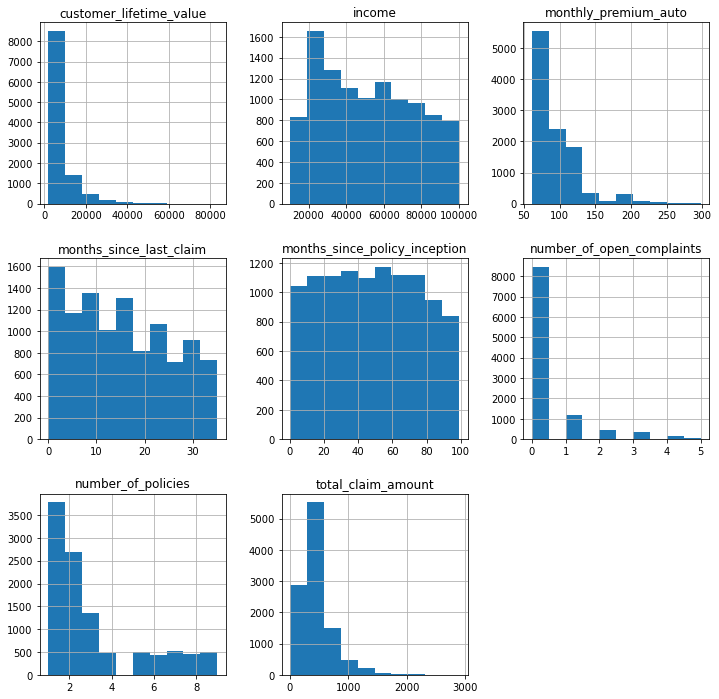

In [43]:
numerical.hist(figsize=(12,12))
plt.show();

*Using Seaborn to construct histograms (With Matplotlib the graphs are more presentable)*

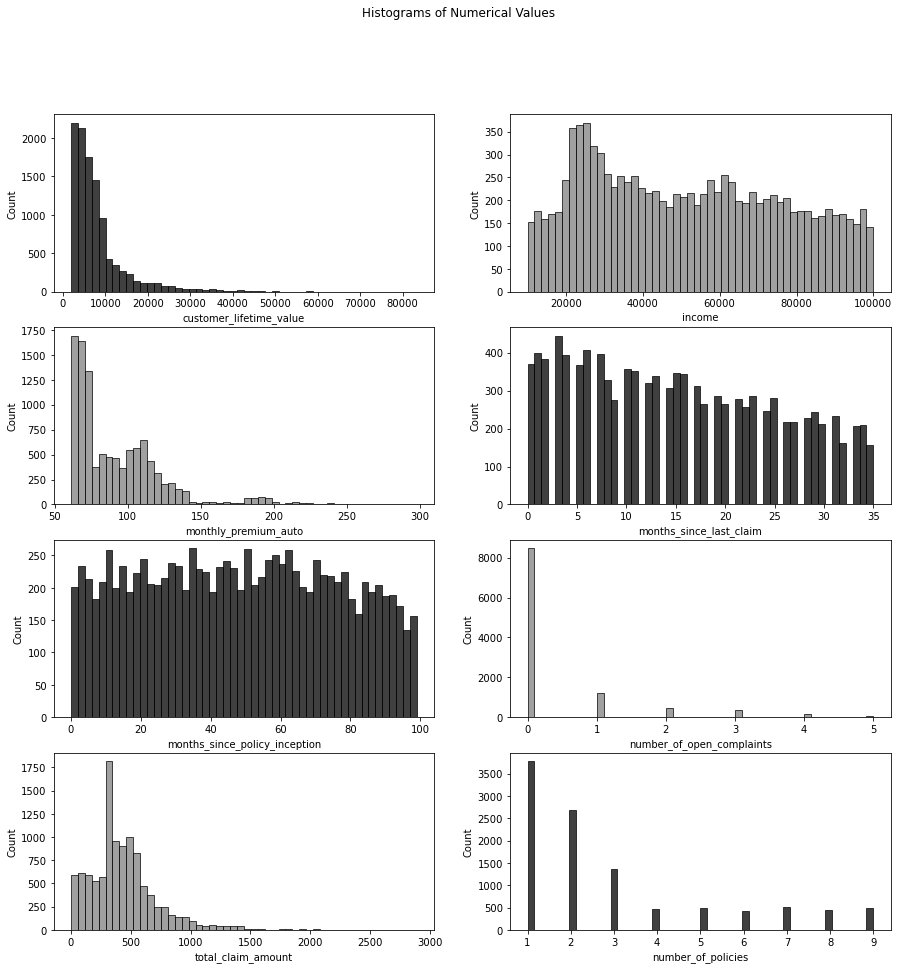

In [44]:
fig, ax = plt.subplots(4,2,figsize = (15,15))
plt.suptitle('Histograms of Numerical Values')
sns.histplot((numerical['customer_lifetime_value']), color="black", bins=50, ax=ax[0,0])
sns.histplot((numerical['income']), color="grey", bins=50,ax=ax[0,1])
sns.histplot((numerical['monthly_premium_auto']), color="grey", bins=50,ax=ax[1,0])
sns.histplot((numerical['months_since_last_claim']), color="black", bins=50,ax=ax[1,1])
sns.histplot((numerical['months_since_policy_inception']), color="black", bins=50,ax=ax[2,0])
sns.histplot((numerical['number_of_open_complaints']), color="grey", bins=50,ax=ax[2,1])
sns.histplot((numerical['total_claim_amount']), color="grey", bins=50,ax=ax[3,0])
sns.histplot((numerical['number_of_policies']), color="black", bins=50,ax=ax[3,1])
plt.show();

*Do the distributions for different numerical variables look like a normal distribution? 
No! All the graphs are still irregular, as we can see in the in the Kernel Density Estimation (KDE) lines below:*

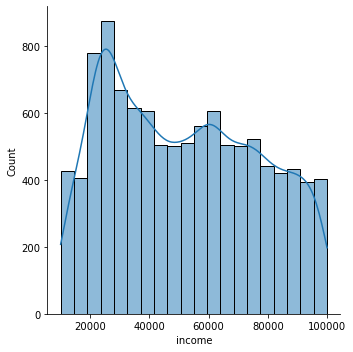

In [45]:
sns.displot(numerical['income'], bins=20, kde=True)
plt.show();

/Users/deni.emmer/opt/anaconda3/envs/DA/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


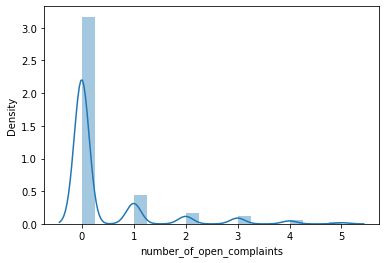

In [46]:
sns.distplot((numerical['number_of_open_complaints']), bins=20)
plt.show();

*Checking the multicollinearity between the features of the numerical variables. 
Please note that we will use the column `total_claim_amount` later as the target variable.*

In [47]:
# check sns.pairplot

In [48]:
numerical.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,-0.000276,0.404235,0.012466,0.017055,-0.028099,0.016789,0.232849
income,-0.000276,1.000000,-0.010804,-0.018013,0.011509,0.013057,-0.001515,-0.118201
monthly_premium_auto,0.404235,-0.010804,1.000000,0.006959,0.019696,-0.002423,-0.018805,0.630149
months_since_last_claim,0.012466,-0.018013,0.006959,1.000000,-0.036883,-0.002617,0.006791,0.008979
months_since_policy_inception,0.017055,0.011509,0.019696,-0.036883,1.000000,0.004368,-0.009719,0.004186
number_of_open_complaints,-0.028099,0.013057,-0.002423,-0.002617,0.004368,1.000000,0.002748,-0.007332
number_of_policies,0.016789,-0.001515,-0.018805,0.006791,-0.009719,0.002748,1.000000,-0.008019
total_claim_amount,0.232849,-0.118201,0.630149,0.008979,0.004186,-0.007332,-0.008019,1.000000


*As we can see above, the numbers of correlation are almost above 0,9. That means that the columns are not correlated with each other.*

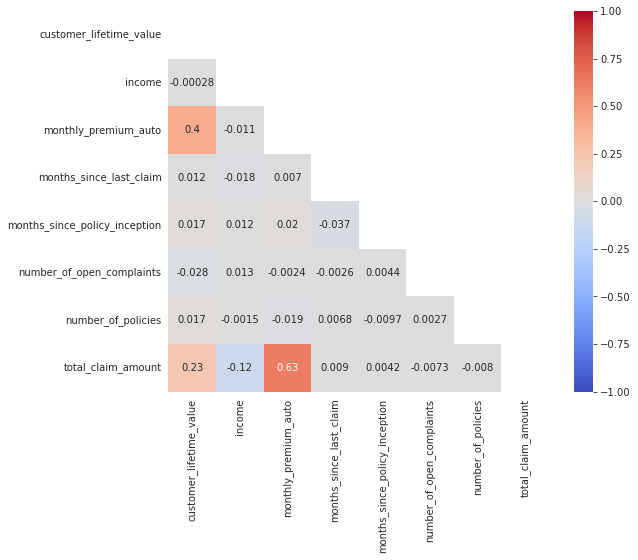

In [49]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

*The only 2 columns that we can highlight as more correlated are Monthly Premium Auto and Total Claim amount, but is still not significant because the value of correlation is lower than 0,9.*

**Plotting the total number of responses.**

In [50]:
resp = categorical['response'].value_counts()
resp


no     9328
yes    1361
Name: response, dtype: int64

*We can see that the amount of "no" responses are much higher than the amount of "yes".*

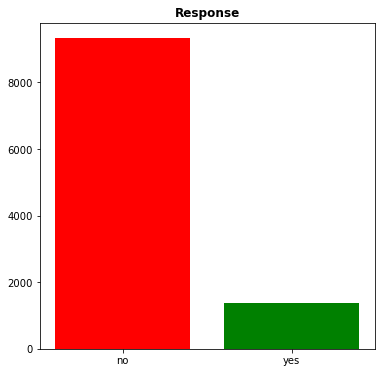

In [51]:
# create figure and axes
fig, ax = plt.subplots(figsize = (6,6))

# set title
ax.set_title('Response', fontweight='bold')

# plot the bar chart
ax.bar(resp.index, resp, color=('red','green'))
plt.show();

**Plotting the response rate by the sales channel.**

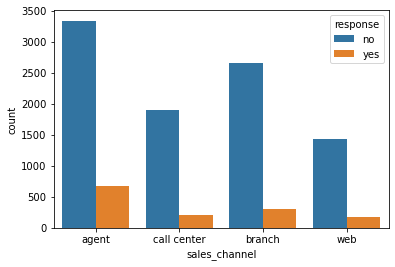

In [52]:
sns.countplot(x='sales_channel', hue='response', data=categorical)
plt.show();

*Here we see that the amount of Responses in the "Agent" Sales Channel are the highest. In the web sales channel the amount of Responses are the lowest.*

**Showing a plot of the Response Rate by the Total Claim Amount.** 

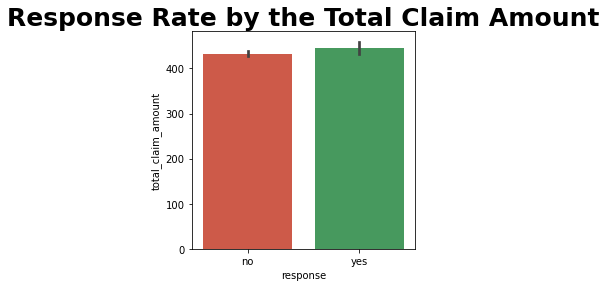

In [53]:
sns.set_palette('RdYlGn')
palette_alive = {"yes": "C5", "no": "C0"}

fig, ax1 = plt.subplots(figsize = (4,4))
ax1.set_title('Response Rate by the Total Claim Amount', size='25', fontweight='bold')

sns.barplot(x = categorical['response'], y = numerical['total_claim_amount'], ax = ax1, palette=palette_alive)
plt.show();

*Here we can see that the people that was inside the column "yes" in the graph of responses are more active and make more effort to be in tuch with the company, but also make a higher number of claims. The ammount of claims of "no" responses are almost equal the values of claims of "yes" responses. Proporcionally the number of clientes that are more active in the answers, also make more compains.*

**Showing a plot of the response rate by income.**

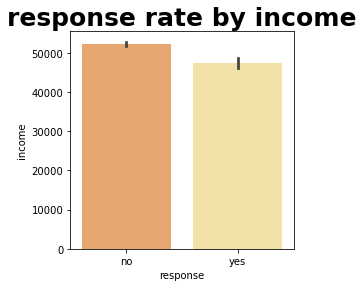

In [54]:
sns.set_palette('RdYlGn')
palette_alive = {"yes": "C2", "no": "C1"}

fig1, ax2 = plt.subplots(figsize = (4,4))
ax2.set_title('response rate by income', size='25', fontweight='bold')

sns.barplot(x = categorical['response'], y = numerical['income'], ax = ax2, palette=palette_alive)
plt.show();

*Here we can predict that the customers with higher incomes are less in contact with the company than the people with lower income. The ammount of claims of "no" responses are almost equal the values of claims of "yes" responses, but there's a small difference between the columns.*

Activities Week 4 Day 1

One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 4. 
(Hint: check Dropfirst option)

In [55]:
categorical


,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [56]:
# import required libraries
import pandas as pd
import numpy as np

# creating initial dataframe
categorical_types = ('region','response','coverage','education','effective_to_date','month','employment_status', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy','renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size')
categorical_df = pd.DataFrame(categorical_types, columns=['Categorical_Types'])

# converting type of columns to 'category'
categorical_df['Categorical_Types'] = categorical_df['Categorical_Types'].astype('category')

# Assigning numerical values and storing in another column
categorical_df['Categorical_Types_Cat'] = categorical_df['Categorical_Types'].cat.codes
categorical_df

,Categorical_Types,Categorical_Types_Cat
0,region,10
1,response,12
2,coverage,0
3,education,1
4,effective_to_date,2
5,month,7
6,employment_status,3
7,gender,4
8,location_code,5
9,marital_status,6


In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder

enc = OneHotEncoder(handle_unknown='ignore')

# passing bridge-types-cat column (label encoded values of bridge_types)

enc_df = pd.DataFrame(enc.fit_transform(categorical_df[['Categorical_Types_Cat']]).toarray())

# merge with main df bridge_df on key values
categorical_df = categorical_df.join(enc_df)
categorical_df

,Categorical_Types,Categorical_Types_Cat,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,region,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,response,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,coverage,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,education,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,effective_to_date,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,month,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,employment_status,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,gender,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,location_code,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,marital_status,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


For the first iteration, we will focus on the numericals data (numericals data frame) as our data source.

Remove the outliers from the numerical columns.

In [58]:
categorical = pd.get_dummies(categorical, columns = ['region'], drop_first = True)
categorical = pd.get_dummies(categorical, columns = ['response'], drop_first = True)
categorical = pd.get_dummies(categorical, columns = ['coverage'], drop_first = True)
categorical = pd.get_dummies(categorical, columns = ['education'], drop_first = True)
categorical = pd.get_dummies(categorical, columns = ['month'], drop_first = True)
categorical = pd.get_dummies(categorical, columns = ['employment_status'], drop_first = True)
categorical = pd.get_dummies(categorical, columns = ['location_code'], drop_first = True)

In [59]:
categorical


,effective_to_date,gender,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,region_east,...,education_doctor,education_high school or below,education_master,month_jan,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,location_code_suburban,location_code_urban
0,2/18/11,m,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize,0,...,0,0,0,0,1,0,0,0,1,0
1,1/18/11,f,single,personal auto,personal l3,offer4,call center,four-door car,medsize,0,...,0,0,0,1,0,0,0,1,1,0
2,2/10/11,m,single,personal auto,personal l3,offer3,call center,suv,medsize,1,...,0,0,0,0,1,0,0,0,1,0
3,1/11/11,m,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize,0,...,0,0,0,1,1,0,0,0,1,0
4,1/17/11,f,married,personal auto,personal l2,offer1,branch,four-door car,medsize,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1/19/11,f,married,personal auto,personal l1,offer3,web,luxury car,medsize,0,...,0,0,0,1,0,0,0,1,1,0
10685,1/6/11,f,married,personal auto,personal l3,offer2,branch,four-door car,medsize,0,...,0,0,0,1,1,0,0,0,0,1
10686,2/6/11,f,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize,0,...,0,0,0,0,1,0,0,0,0,0
10687,2/13/11,f,divorced,personal auto,personal l1,offer1,branch,suv,medsize,0,...,0,0,0,0,1,0,0,0,0,1


In [60]:
numerical


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [61]:
numerical_col = ['customer_lifetime_value','income','monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']

In [62]:
numerical_col2 = ['customer_lifetime_value', 'monthly_premium_auto', 'total_claim_amount']

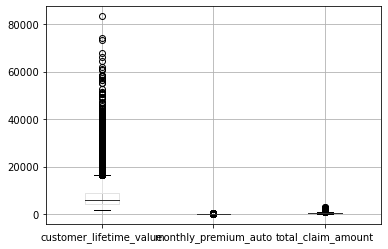

In [63]:
numerical.boxplot(numerical_col2)
plt.show();

In [64]:
#for x in ['customer_lifetime_value'][:5]:
q75,q25 = np.percentile(numerical['customer_lifetime_value'],[25,75])
print(q75, q25)
#intr_qr = q75-q25
 
#max = q75+(1.5*intr_qr)
#min = q25-(1.5*intr_qr)
# 
#numerical.loc[numerical[x] < min,x] = np.nan
#numerical.loc[numerical[x] > max,x] = np.nan

4014.0 8991.0


In [67]:
#Finding the Outliers
numerical[(numerical['customer_lifetime_value'] > 8991.0) | (numerical['customer_lifetime_value'] < 4014.0)]

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
9,17114,70961,85,19,8,0,2,408
...,...,...,...,...,...,...,...,...
10682,2771,59855,74,30,82,4,1,355
10683,19228,56544,187,14,32,0,2,897
10684,15563,64811,253,8,40,2,7,1214
10686,23893,39837,201,11,63,0,2,381


In [68]:
#Trimming of Outliers

new_numerical = numerical[(numerical['customer_lifetime_value'] < 8991.0) & (numerical['customer_lifetime_value'] > 4014.0)]
new_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
5,4745,50549,61,2,73,0,7,292
6,5035,37405,63,8,99,3,4,287
7,4956,87197,63,35,45,0,3,247
8,5989,66839,154,33,24,0,1,739
...,...,...,...,...,...,...,...,...
10678,8610,12791,111,27,36,0,9,532
10679,6423,54424,188,5,67,0,1,1621
10680,4547,33531,116,11,15,0,1,801
10685,5259,61146,65,7,68,0,6,273


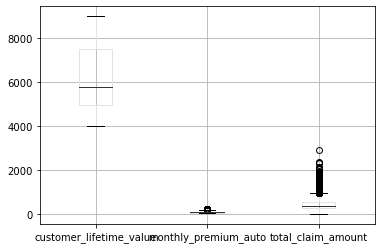

In [69]:
new_numerical.boxplot(numerical_col2)
plt.show();

Check if there are highly correlated features and drop them if there are any.

In [72]:
import numpy as np

# Create correlation matrix
corr_matrix = new_numerical.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
new_numerical.drop(to_drop, axis=1, inplace=True)

/var/folders/fz/8c6p2kfn5z98lys6tff8f9jm0000gn/T/ipykernel_54139/2078054285.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
/var/folders/fz/8c6p2kfn5z98lys6tff8f9jm0000gn/T/ipykernel_54139/2078054285.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_numerical.drop(to_drop, axis=1, inplace=True)


In [73]:
new_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
5,4745,50549,61,2,73,0,7,292
6,5035,37405,63,8,99,3,4,287
7,4956,87197,63,35,45,0,3,247
8,5989,66839,154,33,24,0,1,739
...,...,...,...,...,...,...,...,...
10678,8610,12791,111,27,36,0,9,532
10679,6423,54424,188,5,67,0,1,1621
10680,4547,33531,116,11,15,0,1,801
10685,5259,61146,65,7,68,0,6,273


X-y split (y is the target variable which is the total claim amount)